# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on there medical attributes.

Our Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [1]:
import pandas as pd
pd.read_csv("heart-disease.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Preparing the tools

Using Pandas,  Matplotlib, and NumPy for data analysis and manipulation.

In [3]:
# Import tools

# Regular EDA (Exploritory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# makes plots appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [14]:
df = pd.read_csv("heart-disease.csv")

In [15]:
# Rows and Columns
df.shape

(303, 14)

## Data Exploration (exploritory data analysis or EDA)

The goal is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers (data thats extremely different from the rest) and why should we care about them?
5. How can we add, change, or remove features to get more out of our data?

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
# Find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

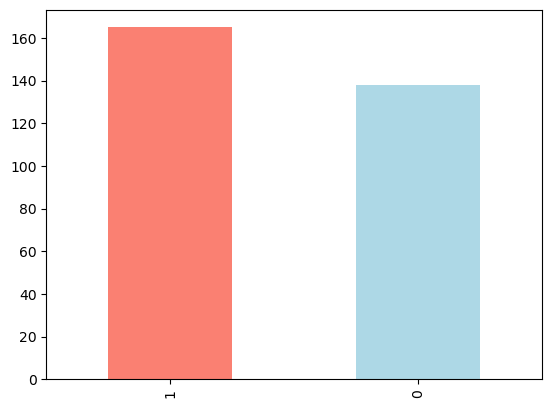

In [24]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
### Heart Disease Frequency acording to Sex

In [31]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [33]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


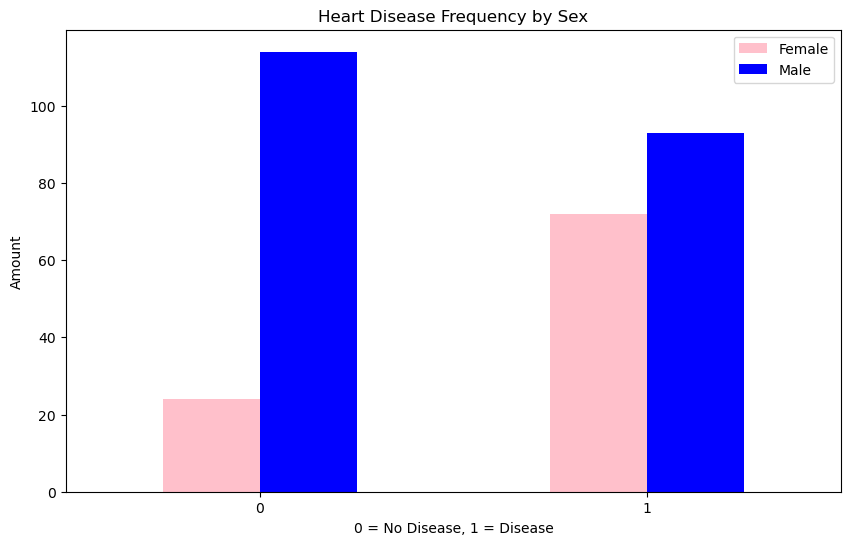

In [46]:
# Create a crosstab plot
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink", "blue"])
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [49]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

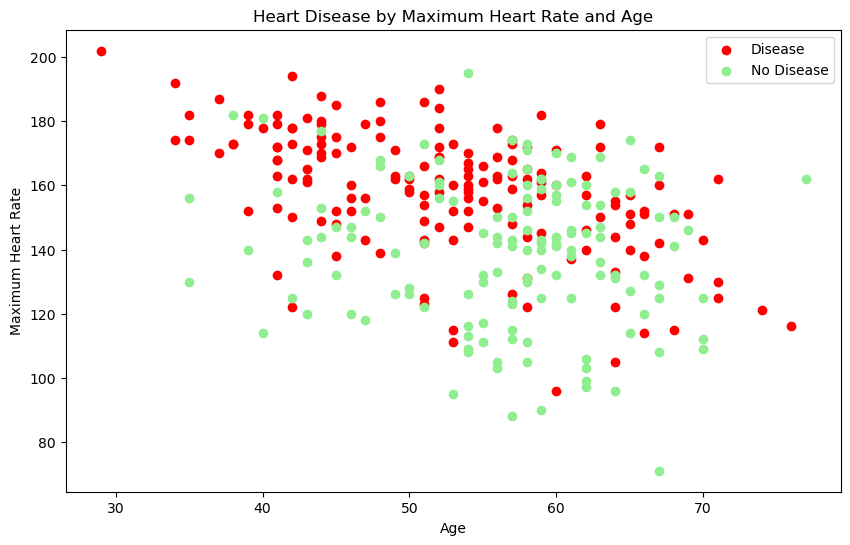

In [61]:
# Create figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color="red")

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color="lightgreen")

plt.title("Heart Disease by Maximum Heart Rate and Age")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"])

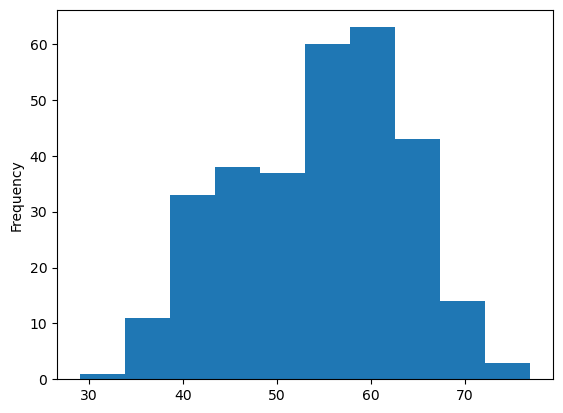

In [63]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency Per Chest Pain Type
cp- Chest-pain type:
* 0 = typical angina 
* 1 = atypical angina 
* 2 = non — anginal pain 
* 3 = asymptotic

In [67]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


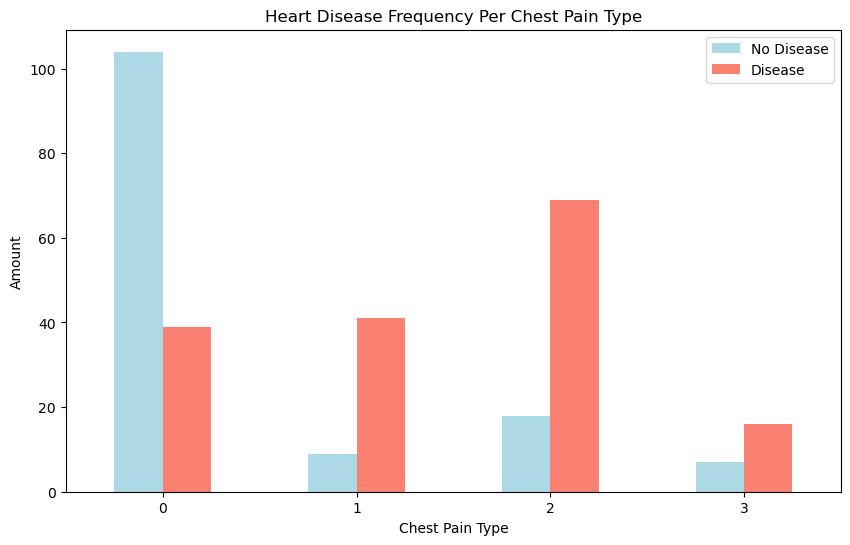

In [77]:
# Making crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=("lightblue","salmon"));

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


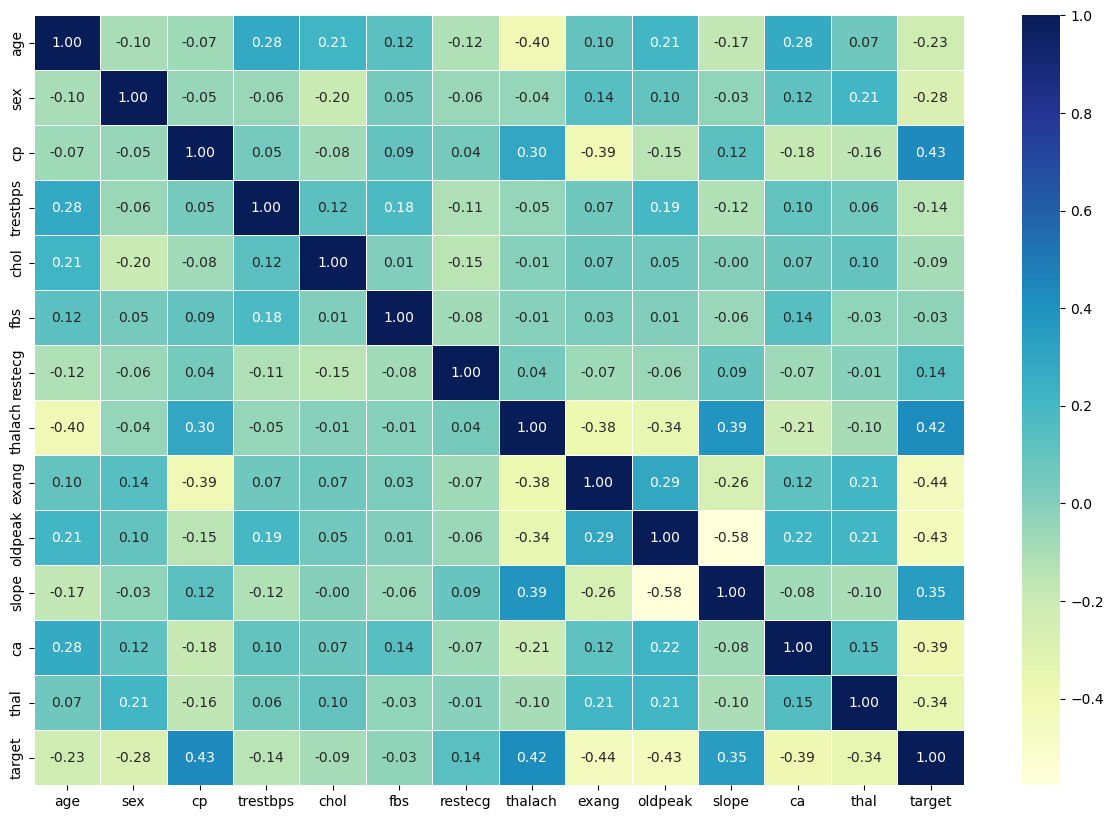

In [80]:
# Making your correlation matrix visually better
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")


## 5. Modelling

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
# Split data into x & y
x = df.drop("target", axis=1)
y = df["target"]

In [86]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [87]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [90]:
# Split data into train and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [93]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Time to build a machine learning model.

Train it (find the patterns) on the training sets.

Test it (use the patterns) on the test sets.

Our 3 machine learning models:
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier


In [109]:
# Put models in a dicitionary
models = {"Logisitic Regression":LogisticRegression(),
          "K-Nearest Neighbors Classifier":KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    models: A dict of different scikit-learn machine learning models.
    x_train: Training data (no labels)
    x_test: Test data (no labels)
    y_train: Training data (labels)
    y_test: Test data (labels)
    """
    # Set random seed
    np.random.seed(42)
    for name, model in models.items():
        model.fit(x_train,y_train)
        print(f"{name} Score: {model.score(x_test,y_test)}")

fit_and_score(models, x_train, x_test, y_train, y_test)   

Logisitic Regression Score: 0.8852459016393442
K-Nearest Neighbors Classifier Score: 0.6885245901639344
Random Forest Classifier Score: 0.8360655737704918


/Users/matthewjudson/Desktop/ML/Project_Heart_Disease/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Put models in a dicitionary
models = {"Logisitic Regression":LogisticRegression(),
          "K-Nearest Neighbors Classifier":KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    models: A dict of different scikit-learn machine learning models.
    x_train: Training data (no labels)
    x_test: Test data (no labels)
    y_train: Training data (labels)
    y_test: Test data (labels)
    """
    # Set random seed
    np.random.seed(42)
    # Make dict to keep models score
    model_score = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_score
        model_score[name] = model.score(x_test, y_test)
    return model_score  

In [114]:
model_scores= fit_and_score(models=models, 
                            x_train=x_train, 
                            x_test=x_test, 
                            y_train=y_train, 
                            y_test=y_test)
model_scores

/Users/matthewjudson/Desktop/ML/Project_Heart_Disease/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitic Regression': 0.8852459016393442,
 'K-Nearest Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

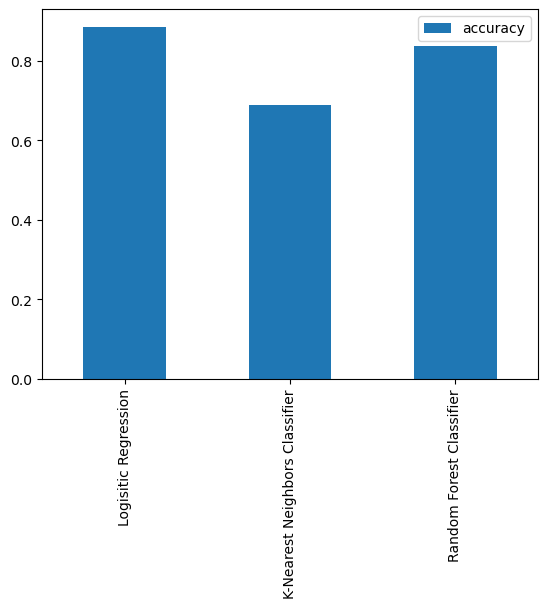

In [120]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

We'll work on the following:

* Hyperparameter Tuning
* Feature Importance 
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### Hyperparameter Tuning

In [126]:
# Tuning KNN

train_scores = []
test_scores = []

# Create list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update test score list
    test_scores.append(knn.score(x_test, y_test))

In [124]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [125]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


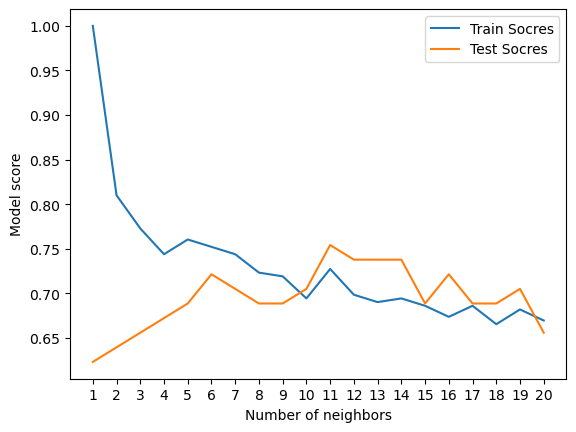

In [132]:
plt.plot(neighbors, train_scores, label="Train Socres")
plt.plot(neighbors, test_scores, label="Test Socres")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
Tuning: 
* LogisticRegression()
* RandomForestClassifier()

... Using RandomizedSearchCV

In [142]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

In [143]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [144]:
# From 10 to 1000. 50+ increments. 
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

Tuning using RandomizedSearchCV with LogisticRegression


In [150]:
# Tune LogisticRegression Model

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegresssion
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [151]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [152]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Tuning using RandomizedSearchCV with RandomForestClassifier

In [153]:
# Tune RandomForestClassifier Model

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [154]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [155]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter Tuning using GridSearchCV

Since our LogisticRegression model provides the best scores so far we"ll try to imporve them again with GridSearchCV...

In [164]:
# Different hyperparameter grid for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4, 4, 30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [165]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [166]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [167]:
model_scores

{'Logisitic Regression': 0.8852459016393442,
 'K-Nearest Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score 
* Confusion Matrix
* Classification Report 
* Precision
* Recall
* F1 Score

... Use cross-validation where possible.

To make comparisons and evaluate the trained model we must first make predictions.

In [168]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [169]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [170]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

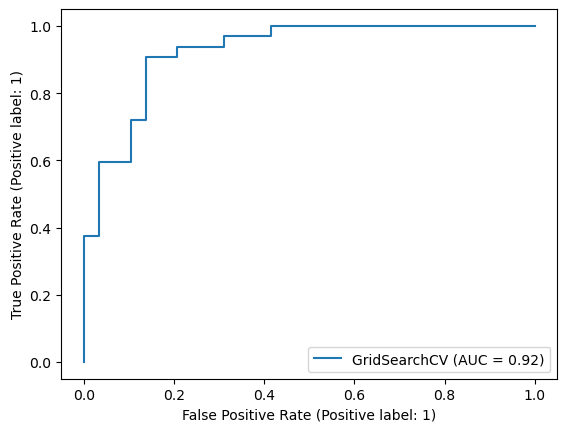

In [175]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [176]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


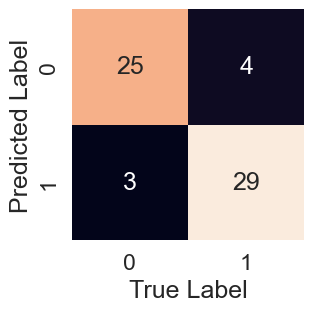

In [182]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a graphically pleasing confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

In [183]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Calculating accuracy, precision, recall, and f1-score with cross-validation using `cross_val_score()`.

In [186]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [187]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [208]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [207]:
# Cross-validated precison
cv_prec = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [209]:
# Cross-validated recall
cv_rec = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [210]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

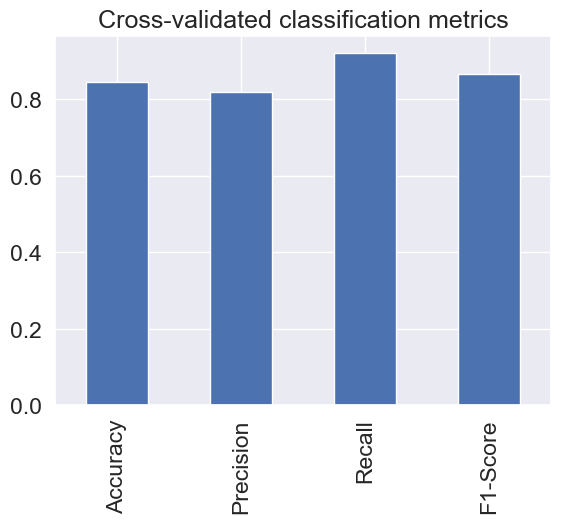

In [218]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc, 
                           "Precision":cv_prec, 
                           "Recall":cv_rec, 
                           "F1-Score":cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another way of asking, "Which features contributed most to the outcomes 
of the model and how did they contribute?".

Finding feature importance is different for each machine learning model.

Finding the feature importance for LogisticRegression model.

In [221]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [222]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [223]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

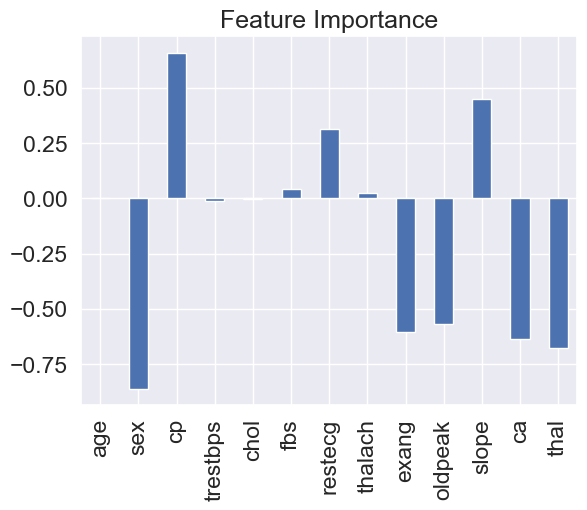

In [228]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", 
                      legend=False);

In [229]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [230]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope- Slope of the peak exercise ST segment : 
* 0 = upsloping: better heart rate with excercise (uncommon) 
* 1 = flat: minimal change (typical healthy heart) 
* 2 = downsloping: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet...ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what you've done so far)
* If  model is good enough (you have hit your evaluation metric) how would you export and share it with others?